In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [48]:
df = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/faithful.csv")
x = np.array(df)
XData = []

for i in range(0,len(x)):
    temp = [x[i][1],x[i][2]] 
    # errurptions , waitings
    XData.append(temp)
    
XData = np.array(XData)


In [49]:
class KMeansCluster:
  def __init__(self,clusters,iterations):
    self.K = clusters
    self.iters = iterations

  def intializeCentroids(self,XData):
    numSamples,numFeatures = XData.shape
    centroids = np.zeros((self.K,numFeatures)) #initializing K number of centroids
    for cluster in range(self.K):
      random = np.random.randint(0,numSamples)
      newCentroid = XData[random] # randomly assigning K centroids from the data itself
      centroids[cluster] = newCentroid

    return centroids


  def createCluster(self,XData,centroids):
    clusters = []
    
    for i in range(self.K):
      temp = []
      clusters.append(temp)
    
    for index,dataPoint in enumerate(XData):
      euclDistance = np.sqrt(np.sum((dataPoint - centroids)**2,axis = 1))
    #eucledian distance between th data point and all the centroids
      closestCentroid=np.argmin(euclDistance)
        #considereing that particular cluster to whose centroid the data point is closest
      clusters[closestCentroid].append(index)
    
    return clusters

  def updateCentroids(self , XData , clusters):
        
    numSamples,numFeatures = XData.shape
    centroids = np.zeros((self.K,numFeatures))
    for index , cluster in enumerate(clusters):
      newCentroid = np.mean(XData[cluster],axis =  0)
    #updating centroids 
      centroids[index] = newCentroid
    return centroids

  def predictCluster(self , XData , clusters):
        #predicting to which cluster does the datapoint belong to
    numSamples,numFeatures = XData.shape
    y_pred = np.zeros(numSamples)
    for index , cluster in enumerate(clusters):
      for sampleIndex in cluster:
        y_pred[sampleIndex] = index

    return y_pred

  def check(self,prevCentroids , newCentroids):
        #checking if the centroids in the previous iteration are same as that of the current centroids
    difference  = prevCentroids - newCentroids
    if not difference.any():
      return True
    return False
  

  def plotGraph(self,XData,y_pred,centroids):
    #plotting graph between x and y
    #plotting a scatter graph to visualize the centroids
    plt.scatter(XData[:,0],XData[:,1], c = y_pred)
    plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=200,color='r')
    
    
  def cost_function(self, X, centroids, labels):

    n_samples,n_features = X.shape
    n_clusters = centroids.shape[0]
    cost = 0
    for k in range(n_clusters):
        # Get the data points assigned to the k-th cluster
        X_k = X[labels == k, :]
        # Calculate the squared Euclidean distance between each data point and the centroid of the k-th cluster
        dist_k = np.sum((X_k - centroids[k, :])**2)
        # Accumulate the cost for the k-th cluster
        cost += dist_k
    # Return the total cost
    #print(cost/n_samples)
    return cost #/ n_samples


  def fit(self,XData):
    centroids = self.intializeCentroids(XData)
    loss = []
    for iter in range(self.iters):
      #creating the clusters
      clusters = self.createCluster(XData,centroids)
      previousCentroids = centroids
    #updating the centroids
      centroids = self.updateCentroids(XData,clusters)
        #predicting the cluster of the data points
      y_pred = self.predictCluster(XData,clusters)
    #calculating the loss 
      temp2 = self.cost_function(XData, centroids, y_pred)
      loss.append(temp2)
      self.plotGraph(XData,y_pred,centroids)
      if(self.check(previousCentroids,centroids) == True):
        break
      
    y_pred = self.predictCluster(XData,clusters)
    #final predictions

    return y_pred ,centroids, loss #returning the final predicted values, centroids and loss    

NORMALIZING THE DATA

In [50]:
mean = np.mean(XData, axis=0)
std = np.std(XData, axis=0)
for i in range(XData.shape[1]):
    XData[:, i] = (XData[:, i] - mean[i]) / std[i]
    

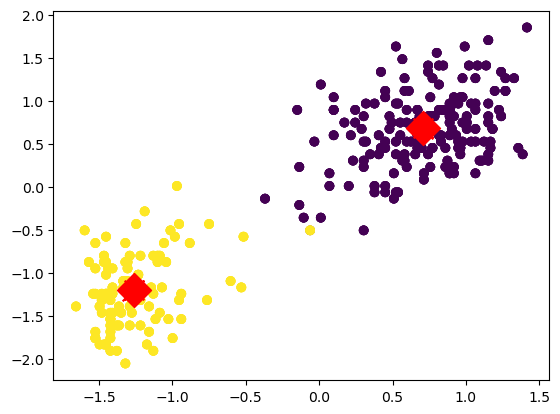

In [51]:
kmeans = KMeansCluster(2,500)
y_pred,centroids, loss = kmeans.fit(XData)
kmeans.plotGraph(XData,y_pred,centroids)
plt.scatter(centroids[:,0],centroids[:,1],marker='D',s=300,color='r')
plt.show()

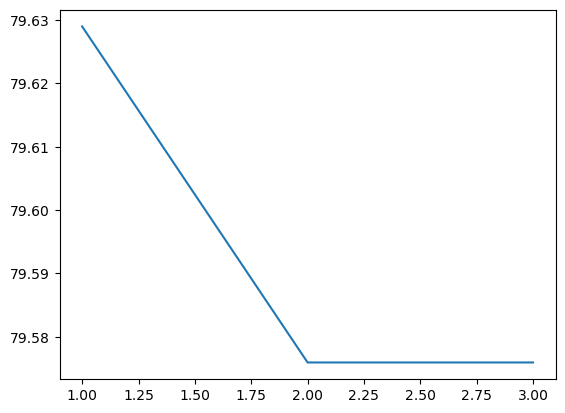

In [52]:
x = []
for i in range(len(loss)):
    x.append(i+1)
plt.plot(x, loss)
plt.show()

C:\Users\gutti\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\gutti\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


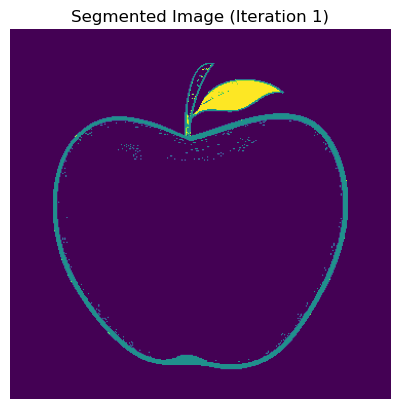

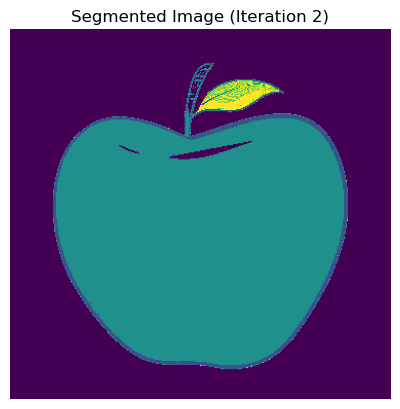

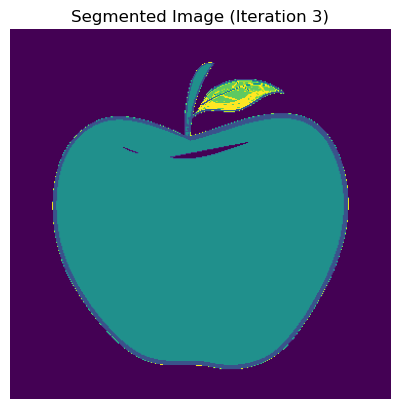

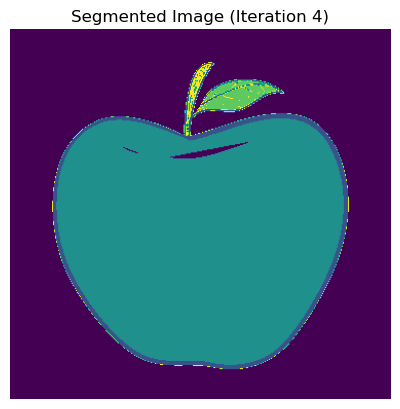

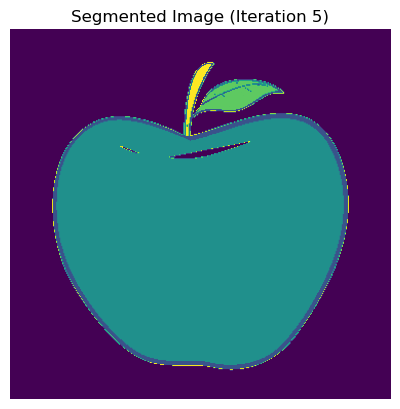

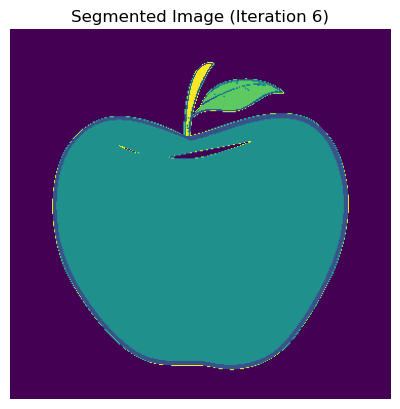

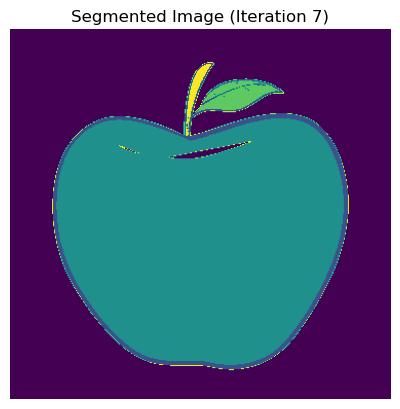

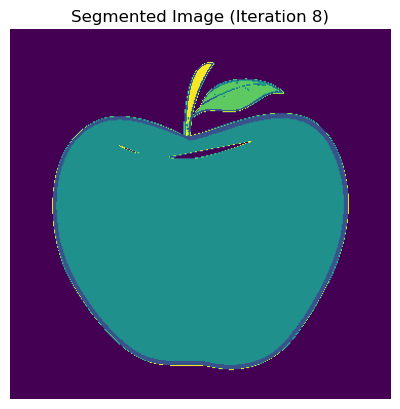

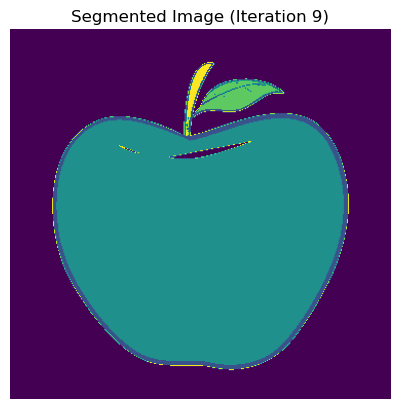

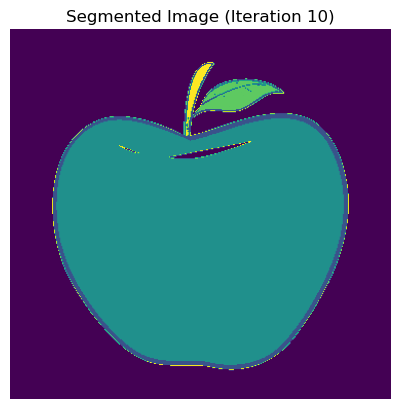

In [53]:
# Load the image
img = cv2.imread('apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape

# Reshape the image to a 2D array of pixels
X = img.reshape(height*width, 3)

# Define the number of clusters
K = 5

# Initialize the cluster centroids randomly
centroids = np.random.randint(0, 256, (K, 3))

# Run the K-means algorithm for 10 iterations
for i in range(10):
    # Assign each pixel to the nearest cluster center
    labels = np.argmin(np.sqrt(np.sum((X - centroids[:, np.newaxis])**2, axis=2)), axis=0)

    # Update the cluster centroids as the mean of the assigned pixels
    for k in range(K):
        centroids[k] = np.mean(X[labels == k], axis=0)

    # Reshape the labels array to the shape of the original image
    segmented = labels.reshape(height, width)

    # Display the segmented image
    plt.imshow(segmented)
    plt.title("Segmented Image (Iteration {})".format(i+1))
    plt.axis('off')
    plt.show()
